#Regresja liniowa

In [94]:
# import bibliotek
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

##Regresja liniowa jednej zmiennej

In [95]:
# funckje w ramach tej części laboratorium
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_1*x+theta_0*np.ones(np.shape(x))

def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    J = 1/(2*y.size)*np.sum(np.square(h_fun(x, theta_0, theta_1)-y))
    return J

def gradient_descent_method(x, y, theta_0_0, theta_1_0, eps, alpha):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0_0: początkowa wartość parametru wolnego modelu regresji liniowej jednej zmiennej
    :param theta_1_0: początkowa wartość parametru przy xi modelu regresji liniowej jednej zmiennej
    :param eps: akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :param alpha: długość kroku (learning rate)
    :return: optymalne pod względem minimalizacji funkcji kosztu parametry modelu regresji liniowej jednej zmiennej theta_0, theta_1
    '''
    first_attempt_flag = 1
    f_i = calculate_cost(x, y, theta_0_0, theta_1_0)
    f_i_1 = 0
    theta_0 = theta_0_0
    theta_1 = theta_1_0
    while np.abs(f_i-f_i_1) > eps or first_attempt_flag:
      if first_attempt_flag:
        first_attempt_flag = 0
      gradient_theta_0 = 1/x.size*np.sum(h_fun(x, theta_0, theta_1)-y)
      gradient_theta_1 = 1/x.size*(np.dot(h_fun(x, theta_0, theta_1)-y, x.T))
      theta_0 = theta_0 - alpha * gradient_theta_0
      theta_1 = theta_1 - alpha * gradient_theta_1
      f_i_1 = f_i
      f_i = calculate_cost(x, y, theta_0, theta_1)
    return theta_0, theta_1

In [96]:
# odczyt danych z pliku 'measurements.csv'
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

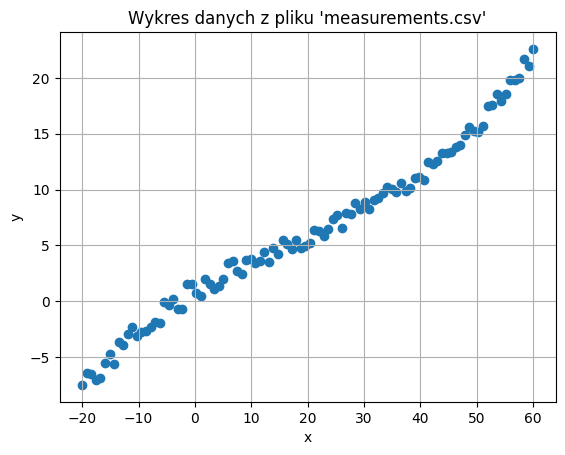

In [97]:
# podział danych między zmienne
x = data[:, 0] # argument funkcji
y = data[:, 1] # wartość funkcji

# wykres danych z pliku 'measurements.csv'
plt.figure()
plt.scatter(x, y)
plt.title("Wykres danych z pliku 'measurements.csv'")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

theta_0 =  0.006487625721530941
theta_1 =  0.31538414999818687
Wartość funckji kosztu dla powyższych parametrów modelu:  0.6391738019166292




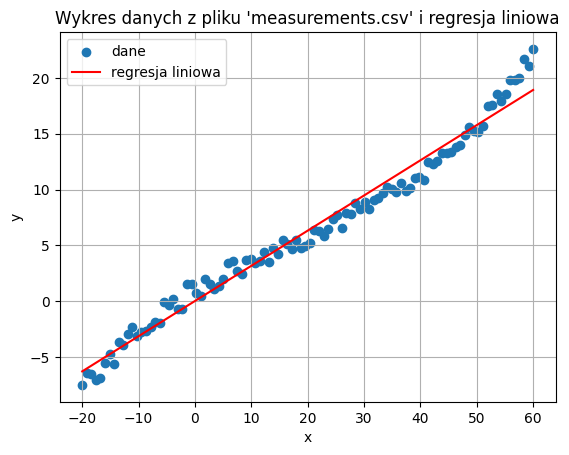

In [98]:
# parametry optymalizacji i modelu
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 0.001  # learning rate
theta_0_0 = 0  # - wartości początkowe parametrów modelu
theta_1_0 = 0

theta_0, theta_1 = gradient_descent_method(x, y, theta_0_0, theta_1_0, eps, alpha)

print("theta_0 = ", theta_0)
print("theta_1 = ", theta_1)
print("Wartość funckji kosztu dla powyższych parametrów modelu: ", calculate_cost(x, y, theta_0, theta_1))

print('\n')

# wykres danych z pliku 'measurements.csv' + regresja liniowa
plt.figure()
plt.scatter(x, y) # dane z pliku
plt.plot(x, h_fun(x, theta_0, theta_1), 'r') # regresja liniowa
plt.title("Wykres danych z pliku 'measurements.csv' i regresja liniowa")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(["dane", "regresja liniowa"])
plt.show()

##Regresja liniowa wielu zmiennych

In [99]:
# funckje w ramach tej części laboratorium
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: ndarray postaci (1, m)
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    J = 1/(2*y.size)*np.sum(np.square(h_fun(X, theta)-y))
    return J

def gradient_descent_method(X, y, theta_0, eps, alpha):
    '''
    :param X: ndarray o wymiarze (n+1, m) - ilość cech + 1 x ilość przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak 1 x m
    :param theta_0_0: początkowa wartość parametru wolnego modelu regresji liniowej wielu zmiennych
    :param theta_1_0: początkowa wartość parametru przy xi modelu regresji liniowej wielu zmiennych
    :param eps: akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :param alpha: długość kroku (learning rate)
    :return: optymalne pod względem minimalizacji funkcji kosztu parametry modelu regresji liniowej wielu zmiennych theta_0, theta_1
    '''
    first_attempt_flag = 1
    m = y.size
    f_i = calculate_cost(X, y, theta_0)
    f_i_1 = 0
    theta = theta_0
    while np.abs(f_i-f_i_1) > eps or first_attempt_flag:
      if first_attempt_flag:
        first_attempt_flag = 0
      h_y_diff = (h_fun(X, theta)-y)
      gradient = h_y_diff @ X.T
      theta = theta-alpha*gradient.T/m
      f_i_1 = f_i
      f_i = calculate_cost(X, y, theta)
    return theta

###Dane - 'measurements.csv'

In [100]:
# odczyt danych z pliku 'measurements.csv'
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

# podział danych między zmienne
x = data[:, 0] # argument funkcji
y = data[:, 1] # wartość funkcji

# przekształcenie do macierzy
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

# sprawdzenie wymiarów macierzy
print("Wymiary macierzy X: ", X.shape)
print("Wymiary macierzy y: ", y.shape)
print("Wymiary macierzy będącej wynikiem użycia funkcji h_fun: ", h_fun(X, np.array([[1], [1]])).shape)

Wymiary macierzy X:  (2, 100)
Wymiary macierzy y:  (1, 100)
Wymiary macierzy będącej wynikiem użycia funkcji h_fun:  (1, 100)


In [101]:
# parametry optymalizacji i modelu
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 0.001  # learning rate
theta_0 = np.array([[0], [0]])  # - wartości początkowe parametrów modelu

theta = gradient_descent_method(X, y, theta_0, eps, alpha)

print("theta_0 = ", theta[0][0])
print("theta_1 = ", theta[1][0])
print("Wartość funckji kosztu dla powyższych parametrów modelu: ", calculate_cost(X, y, theta))

theta_0 =  0.006487625845792057
theta_1 =  0.31538415538147335
Wartość funckji kosztu dla powyższych parametrów modelu:  0.6391738572130962


###Dane - 'housing.txt'

In [102]:
# odczyt danych z pliku 'housing.txt'
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

In [103]:
# skalowanie danych
y_scale = y.max()
y = y/y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X/X_scale

In [104]:
# parametry optymalizacji i modelu
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 0.001  # learning rate
theta_0 = np.array([[0], [0], [0]]) # - wartości początkowe parametrów modelu

theta = gradient_descent_method(X, y, theta_0, eps, alpha)

print("theta_0 = ", theta[0][0])
print("theta_1 = ", theta[1][0])
print("theta_2 = ", theta[2][0])
print("Wartość funckji kosztu dla powyższych parametrów modelu: ", calculate_cost(X, y, theta))

# przykład
example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale)*y_scale # przeskalowanie powrotne
print(f'Koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

theta_0 =  0.24937951349237278
theta_1 =  0.13701888477489663
theta_2 =  0.16736230976894148
Wartość funckji kosztu dla powyższych parametrów modelu:  0.013386763812058227
Koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


##Regresja wielomianowa

In [105]:
# funckje w ramach tej części laboratorium
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: ndarray postaci (1, m)
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    J = 1/(2*y.size)*np.sum(np.square(h_fun(X, theta)-y))
    return J

def gradient_descent_method(X, y, theta_0, eps, alpha):
    '''
    :param X: ndarray o wymiarze (n+1, m) - ilość cech + 1 x ilość przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak 1 x m
    :param theta_0_0: początkowa wartość parametru wolnego modelu regresji liniowej wielu zmiennych
    :param theta_1_0: początkowa wartość parametru przy xi modelu regresji liniowej wielu zmiennych
    :param eps: akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :param alpha: długość kroku (learning rate)
    :return: optymalne pod względem minimalizacji funkcji kosztu parametry modelu regresji liniowej wielu zmiennych theta_0, theta_1
    '''
    first_attempt_flag = 1
    m = y.size
    f_i = calculate_cost(X, y, theta_0)
    f_i_1 = 0
    theta = theta_0
    while np.abs(f_i-f_i_1) > eps or first_attempt_flag:
      if first_attempt_flag:
        first_attempt_flag = 0
      h_y_diff = (h_fun(X, theta)-y)
      gradient = h_y_diff @ X.T
      theta = theta-alpha*gradient.T/m
      f_i_1 = f_i
      f_i = calculate_cost(X, y, theta)
    return theta

In [106]:
# odczyt danych z pliku 'measurements.csv'
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

# podział danych między zmienne
x = data[:, 0] # argument funkcji
y = data[:, 1] # wartość funkcji

# przygotowanie macierzy X - kolejne wiersze to kombinacje nieliniowe oryginalnej cechy
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

In [107]:
# skalowanie danych
X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X/X_scale

y.shape = [1, -1]
y_scale = y.max()
y = y/y_scale

In [108]:
# hiperparametry
eps = 1e-10 # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 1e-3 # learning rate
theta_0 = np.array([[0], [0], [0], [0]]) # - wartości początkowe parametrów modelu

In [109]:
# sprawdzenie wymiarów macierzy
print("Wymiary macierzy X: ", X.shape)
print("Wymiary macierzy y: ", y.shape)
print("Wymiary macierzy theta: ", theta_0.shape)
print("Wymiary macierzy będącej wynikiem użycia funkcji h_fun: ", h_fun(X, np.array([[1], [1], [1], [1]])).shape)

Wymiary macierzy X:  (4, 100)
Wymiary macierzy y:  (1, 100)
Wymiary macierzy theta:  (4, 1)
Wymiary macierzy będącej wynikiem użycia funkcji h_fun:  (1, 100)


theta_0 =  0.025286582048825525
theta_1 =  0.7792190194246954
theta_2 =  -0.49718083275768815
theta_3 =  0.650756790874884
Wartość funckji kosztu dla powyższych parametrów modelu:  0.0003266653045008868




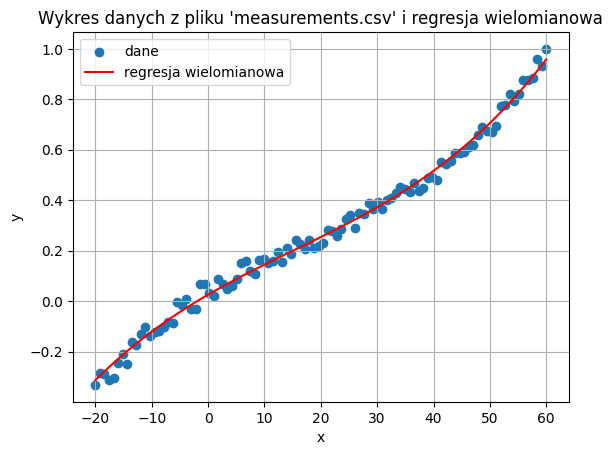

In [110]:
theta = gradient_descent_method(X, y, theta_0, eps, alpha)

print("theta_0 = ", theta[0][0])
print("theta_1 = ", theta[1][0])
print("theta_2 = ", theta[2][0])
print("theta_3 = ", theta[3][0])
print("Wartość funckji kosztu dla powyższych parametrów modelu: ", calculate_cost(X, y, theta))


print('\n')

# wykres danych z pliku 'measurements.csv' + regresja wielomianowa
plt.figure()
plt.scatter(x, y) # dane z pliku
plt.plot(x, h_fun(X, theta).T, 'r') # regresja wielomianowa
plt.title("Wykres danych z pliku 'measurements.csv' i regresja wielomianowa")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(["dane", "regresja wielomianowa"])
plt.show()